In [3]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')
# gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (5,4)
# Tamaño gráficos
plt.rcParams["figure.dpi"] = 100
# resolución gráficos# importamos la base de datos
df = pd.read_csv('qog_std_cs_jan18.csv')

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

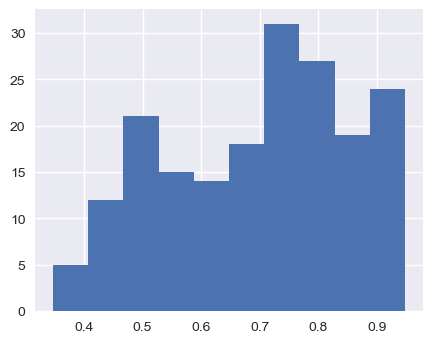

In [4]:
plt.hist(df['undp_hdi'].dropna())

AttributeError: 'Rectangle' object has no property 'hist'

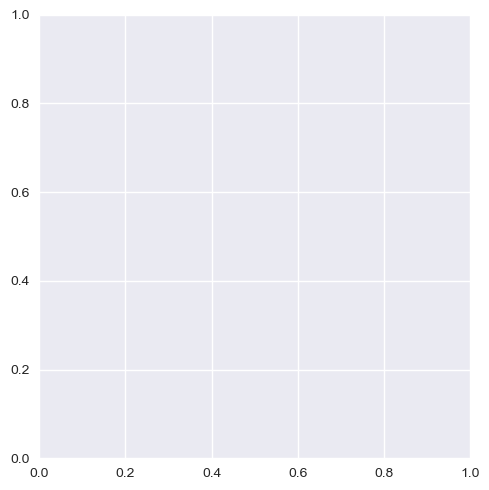

In [9]:
sns.displot(
    df['undp_hdi'].dropna(),
    rug=True, #grafica el posicionamiento específico de cada observación a lo largo del eje X.
    hist=True, #agrega una curva siguiendo una distribución especificada. En este caso agregamos una curva gaussiana siguiendo X~N(hdi_mean,σ(hdi))
    color='sienna').set_title('Distribución del Indice de Desarrollo Humano')

Text(0.5, 1.0, 'Cantidadde registros por región')

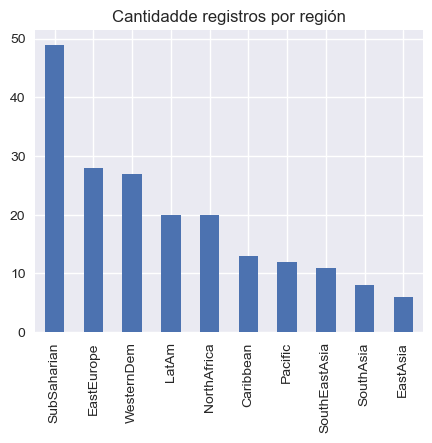

In [46]:
# generemos una variable para agregar los nombres asociados a cada número
df['region_recod'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],
['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem','EastAsia','SouthEastAsia','SouthAsia','Pacific', 'Caribbean'])

# gráficamos en barras el resultado de value_counts.
df['region_recod'].value_counts().plot(kind='bar').set_title('Cantidadde registros por región')

Text(0.5, 1.0, 'Cantidad deregistros por región')

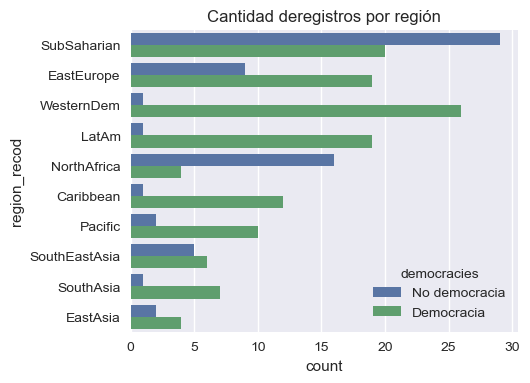

In [52]:
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')

sns.countplot(y = df['region_recod'], hue = df['democracies'], 
              order =df['region_recod'].value_counts().index).set_title('Cantidad deregistros por región')

Text(0.5, 1.0, 'Distribución del IDH por zona geográfica')

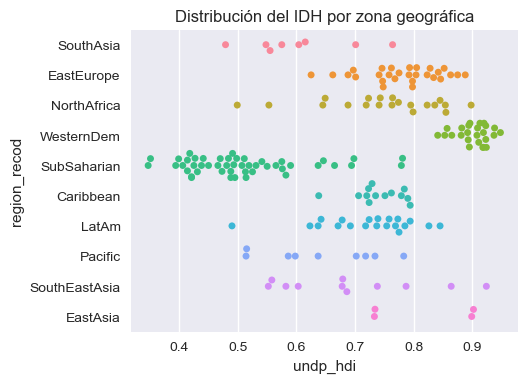

In [53]:
sns.swarmplot(
    y=df['region_recod'],
    x=df['undp_hdi']
).set_title('Distribución del IDH por zona geográfica')

Text(0.5, 1.0, 'Distribución del IDH por región y tipo de gobierno')

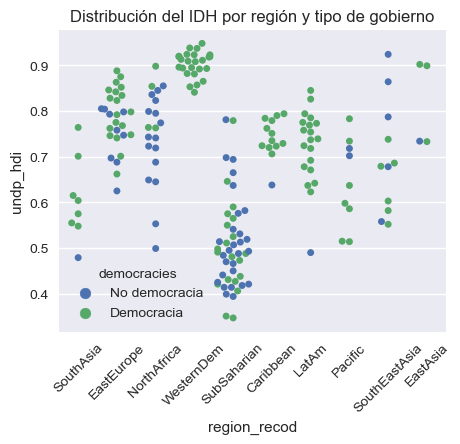

In [54]:
plt.xticks(rotation = 45)
sns.swarmplot(
    x=df['region_recod'],
    y=df['undp_hdi'],
    hue =df['democracies']
).set_title('Distribución del IDH por región y tipo de gobierno')